### Loading the Data

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./Australian Vehicle Prices.csv')

In [6]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [7]:
df.shape

(16734, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

#### Checking for missing values

In [9]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [10]:
df.isna().mean() * 100

Brand                 0.005976
Year                  0.005976
Model                 0.005976
Car/Suv               0.167324
Title                 0.005976
UsedOrNew             0.005976
Transmission          0.005976
Engine                0.005976
DriveType             0.005976
FuelType              0.005976
FuelConsumption       0.005976
Kilometres            0.005976
ColourExtInt          0.005976
Location              2.689136
CylindersinEngine     0.005976
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.017928
dtype: float64

since the missing values percentage is very small, it's safe to delete and continue exploration

In [11]:
df.dropna(inplace=True)

In [12]:
# confirming that missing values does not exist in the dataframe

df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [36]:


df[["Price", "Kilometres"]].describe()

,Price,Kilometres
count,14586,14586
unique,3205,12976
top,29990,10
freq,233,118


In [37]:
df[["Price", "Kilometres"]].describe()

,Price,Kilometres
count,14586,14586
unique,3205,12976
top,29990,10
freq,233,118


In [40]:
# df['Price'] = df['Price'].replace('POA', 0)
# df['Kilometres'] = df['Kilometres'].replace('-', 0)

In [56]:
df['Kilometres'] = df['Kilometres'].apply(int)
df['Price'] = df['Price'].apply(int)

In [101]:
def q1(series):
    return series.quantile(0.25)


def q2(series):
    return series.quantile(0.5)


def q3(series):
    return series.quantile(0.75)


def iqr(series):
    return q3(series) - q1(series)


def lower_outlier(series):
    return q1(series) - 1.5 * iqr(series)


def upper_outlier(series):
    return q3(series) + 1.5 * iqr(series)


def data_range(series):
    return series.max() - series.min()


def mode(series):
    return series.mode()[0]


calculations = [
    "min", "max", "count", "mean", "median", lambda x: x.mode()[0], data_range,
    q1, q2, q3, iqr, "std", lower_outlier, upper_outlier
]

result = df.agg(
    {
        "Price": calculations,
        "Kilometres": calculations,
    }
)

# rename mode and range column
result.rename(index={result.index[5]: 'mode'}, inplace=True)
result.rename(index={result.index[6]: 'range'}, inplace=True)

# Round the result to 2 decimal places
result = result.round(2)

result

,Price,Kilometres
min,0.00,0.00
max,649880.00,526162.00
count,14586.00,14586.00
mean,34896.31,99202.04
median,28990.00,84285.00
mode,29990.00,10.00
range,649880.00,526162.00
q1,18987.00,39787.50
q2,28990.00,84285.00
q3,42498.00,145862.25


In [58]:
df[["Price", "Kilometres"]].describe()

,Price,Kilometres
count,14586.000000,14586.000000
mean,34896.309063,99202.037090
std,29046.727010,78350.773116
min,0.000000,0.000000
25%,18987.000000,39787.500000
50%,28990.000000,84285.000000
75%,42498.000000,145862.250000
max,649880.000000,526162.000000


## Data Cleaning

In [13]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [14]:
# define a function that will handle converting from object type to numeric type

def extract_number(data: pd.DataFrame, column: str, pattern: str) -> pd.Series:
    return data[column].str.extract(pattern, expand=False).astype('float32')


In [15]:
# Handle the Price columns 
# convert columns from object datatype to floating point data type

df['Price'].unique()

array(['51990', '19990', '108988', ..., '32856', '36770', '35280'],
      dtype=object)

In [16]:
df['Price'] = df['Price'].astype(float)

ValueError: could not convert string to float: 'POA'

In [ ]:
df[df['Price'] == 'POA']

In [ ]:
# filter out all the columns with POA as its price value

df = df[df['Price'] != 'POA']

In [ ]:
# confirm that the filter works

df[df['Price'] == 'POA']

In [ ]:
# convert price column to numerical type

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
df.info()

#### Handling kilometer

In [ ]:
df['Kilometres'].unique()

In [ ]:
df['Kilometres'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
df.info()

#### Handling Year

In [ ]:
df['Year'].unique()

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [ ]:
df.info()

#### Handling FuelConsumption

In [ ]:
# since FuelConsumption is in L / 100 km it's safe to remove this value from the columns

replace_value = lambda fuel_str: float(fuel_str.replace(' L / 100 km', ''))

df['FuelConsumption'] = df['FuelConsumption'].apply(replace_value)
df['FuelConsumption'] = df['FuelConsumption'].astype(float)

df['FuelConsumption'].head()

#### Handling CylindersinEngine

In [ ]:
df['CylindersinEngine'].unique()

In [ ]:
my_test = "Hello22 wel123come"

import re

re.sub('\D', '', my_test)

In [ ]:
df['CylindersinEngine'] = extract_number(df, column='CylindersinEngine', pattern=r'(\d+) (?:cyl|L)')
df['CylindersinEngine'] = df['CylindersinEngine'].astype(float)
df['CylindersinEngine'].head()

In [ ]:
df['Doors'] = extract_number(df, column='Doors', pattern=r'(\d+) Doors')
df['Doors'] = df['Doors'].astype(float)
df['Doors'].head()

In [ ]:
df['Seats'] = extract_number(df, column='Seats', pattern=r'(\d+) Seats')
df['Seats'] = df['Seats'].astype(float)
df['Seats'].head()

In [ ]:
# verifying the changed made

df.head()

### Feature Engineering

I will be generating the following features
1. CarAge (how old is the car), this will be gotten from the 'Year' column
2. Mileage (distance the car has covered)

Mileage(km/L) = 100 / FuelConsumption(L/100km)

In [ ]:
from datetime import datetime

current_year = datetime.now().year

df['CarAge'] = current_year - df['Year']

df['CarAge']

In [ ]:
# df['Mileage'] = 100 / (df['FuelConsumption'] if df['FuelConsumption'] > 0 else 1)
# df['Mileage'].head()
# Replace non-positive 'FuelConsumption' values with 1 to avoid division by zero
df['AdjustedFuelConsumption'] = df['FuelConsumption'].where(df['FuelConsumption'] > 0, 1)

# Calculate 'Mileage'
df['Mileage'] = 100 / df['AdjustedFuelConsumption']

In [ ]:
df.head()

### Data Encoding

In [ ]:
df['Transmission'].unique()

In [ ]:
# removing the '-' from transmission
df = df[df['Transmission'] != '-']

df.shape

In [ ]:
df['Transmission'].unique()

In [ ]:
df.head()

In [ ]:
# convert all automatic values to 0 and manual to 1
df['Transmission'] = (df['Transmission'] == 'Manual').astype(int)

df.head()

### look through the dataset and determine the categorical and numerical columns

In [17]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['Year']

In [18]:
# Get the categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

In [19]:
df.describe()

,Year
count,14586.000000
mean,2016.237899
std,4.923525
min,1978.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


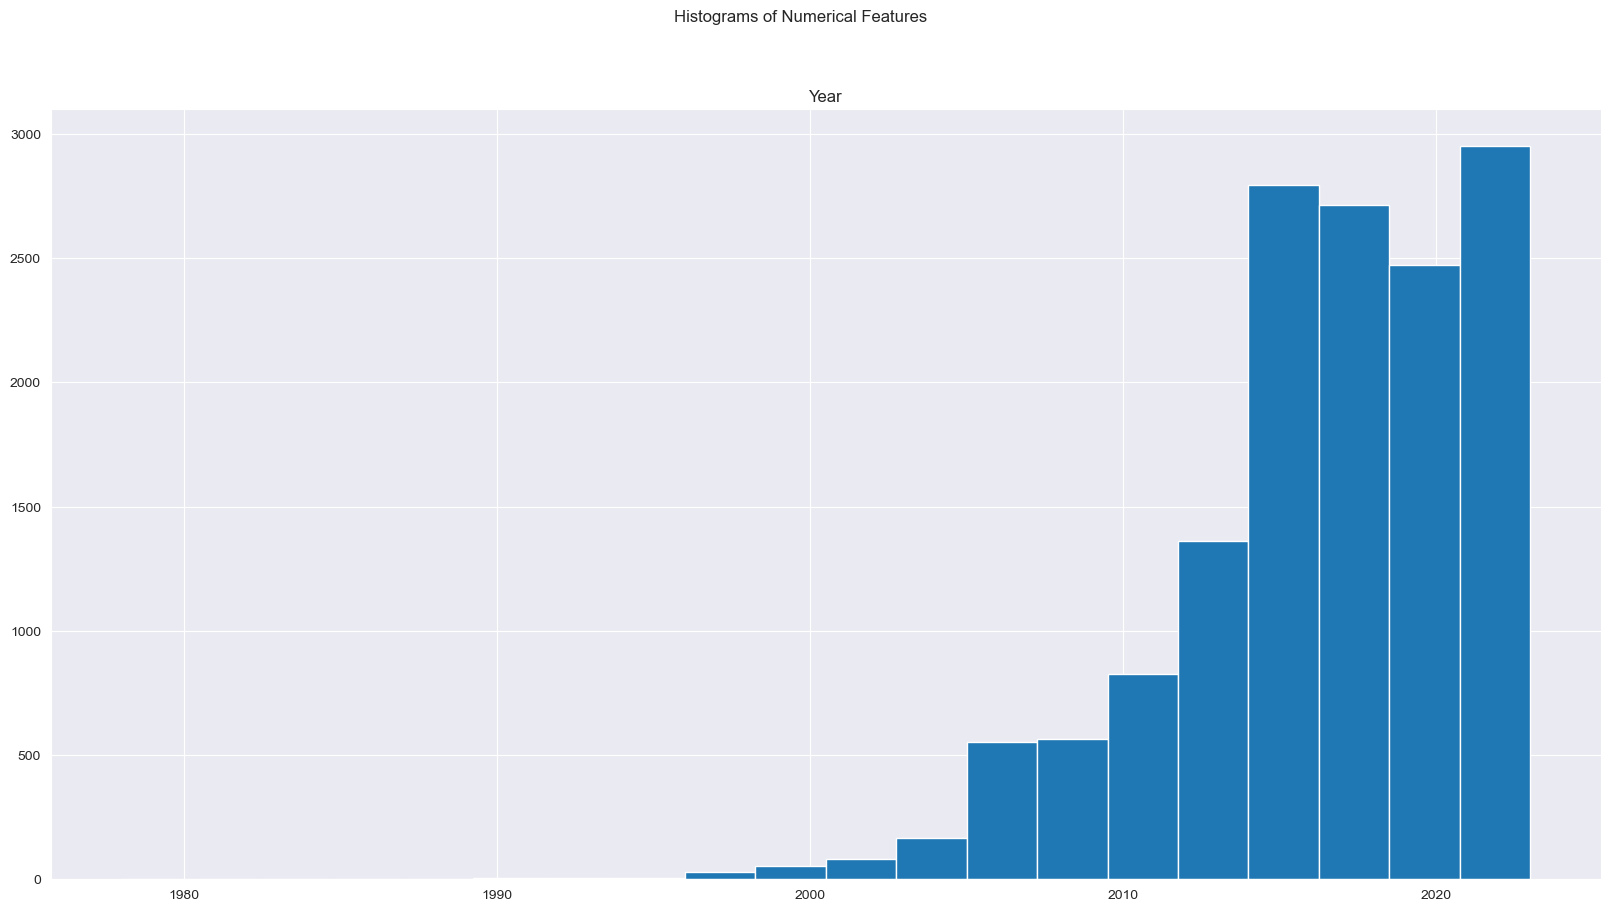

In [20]:
from matplotlib import pyplot as plt

df.hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

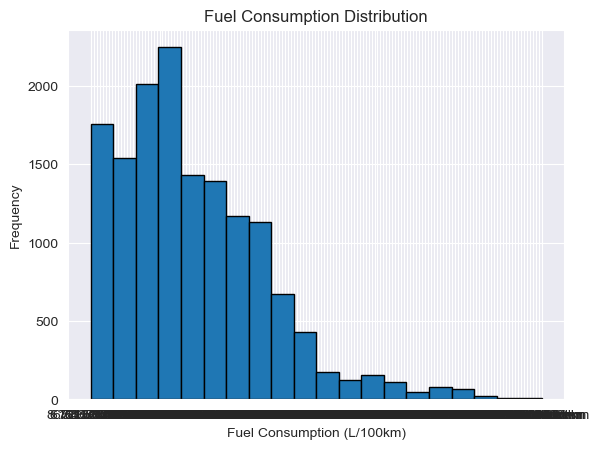

In [21]:
plt.hist(df['FuelConsumption'], bins=20, edgecolor='black')
plt.title('Fuel Consumption Distribution')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.show()

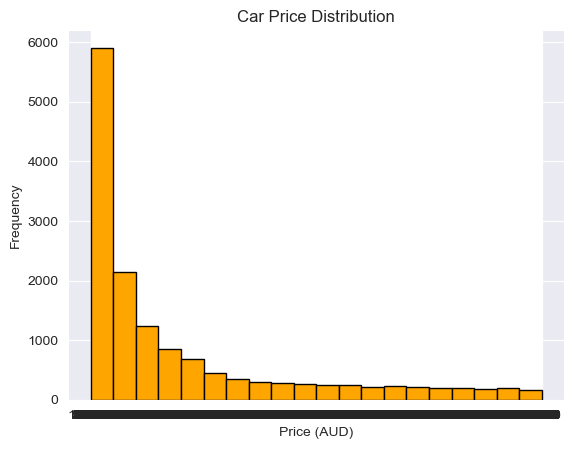

In [22]:
plt.hist(df['Price'], bins=20, color='orange', edgecolor='black')
plt.title('Car Price Distribution')
plt.xlabel('Price (AUD)')
plt.ylabel('Frequency')
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

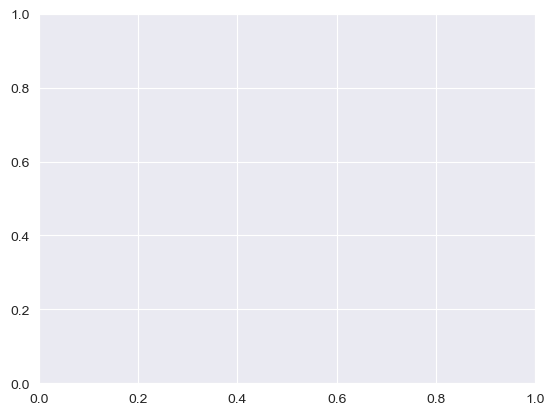

In [23]:
import seaborn as sns

sns.kdeplot(data=df, x='Kilometres')
plt.title("Kilometres")
plt.show()

In [ ]:
cols_to_plot = ['UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType', 'Car/Suv', 'Model', 'Brand', 'Doors',
                'DriveType',
                'Seats',
                'ColourExtInt']

for col in cols_to_plot:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:50])
    plt.title(f'{col} vs Count')
    if len(df[col].value_counts().index) > 50:
        plt.xticks(rotation=90)
    plt.show()

In [ ]:
import plotly.express as px

px.bar(df, x='Model', y='Price', color='Model', range_x=[0, 10], title='Model vs Price')

In [ ]:
px.bar(df, x='Brand', y='Price', color='Brand', range_x=[0, 10], title='Brand vs Price')

In [ ]:
px.scatter(df, x='Price', y='Brand')
# px.bar(df, x='Kilometres', y='Price', color='Kilometres', title='Kilometres vs Price')

In [ ]:
px.scatter(df, x='Model', y='Price')

In [ ]:

fig = px.line(df, x='Kilometres', y='UsedOrNew', color='UsedOrNew', title='Distance(KM) vs UsedOrNew')

fig.show()
df.corr(numeric_only=True)

In [ ]:
df.corr(numeric_only=True)

In [ ]:
numerical_columns_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns_features.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()